In [ ]:
from tensorflow.keras.datasets import  fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

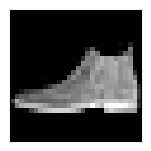

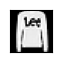

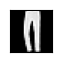

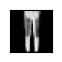

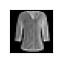

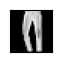

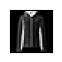

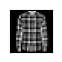

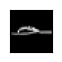

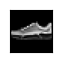

In [ ]:

import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()

  plt.close()

In [ ]:
print("Perivios X-train shape: {} \nPrevious Y_train shape:{}".format(X_train.shape,Y_train.shape))
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)


Perivios X-train shape: (60000, 28, 28) 
Previous Y_train shape:(60000,)


In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

In [ ]:
classes=10
Y_train=to_categorical(Y_train,classes)
Y_test=to_categorical(Y_test,classes)
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape,Y_train.shape))


New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10, 10)


In [ ]:
input_size=784
batch_size=200
hidden1=400
hidden2=20
classes=10
epochs=5

In [ ]:
model=Sequential()
model.add(Dense(hidden1,input_dim=input_size,activation='relu'))
model.add(Dense(hidden2,activation='relu'))
model.add(Dense(classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='sgd')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 20)                8020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 322230 (1.23 MB)
Trainable params: 322230 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Import necessary libraries
from time import time

# Record the current time to measure training time
tic = time()

# Fit the model on the training data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))

# Testing the trained model
### 5. Test
# You can continue your code from here.

Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (200, 10, 10) and (200, 10) are incompatible


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
y_pred_probs=model.predict(X_test,verbose=0)
y_pred=np.where(y_pred_probs>0.5,1,0)
test_accuracy=accuracy_score(y_pred,Y_test)
print("/ntest accuracy:{}".format(test_accuracy))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and unknown targets

In [ ]:
mask=range(20,50)
X_valid=X_test[0:20]
actual_label=Y_test[0:20]
y_pred_probs_valid=model.predict(X_valid)
y_pred_valid=np.where(y_pred_probs_valid>0.5,1,0)



1/1 [==============================] - 0s 21ms/step


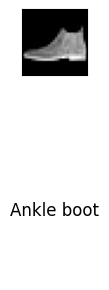

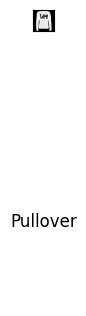

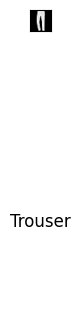

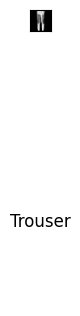

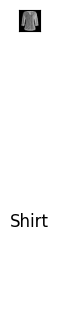

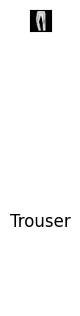

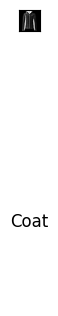

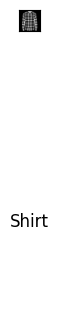

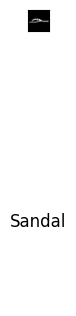

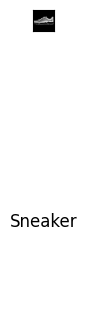

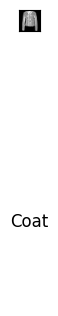

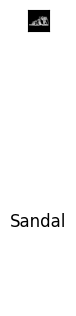

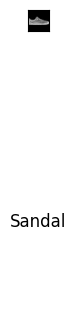

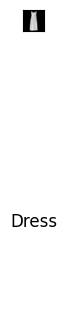

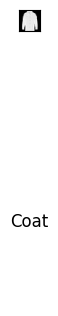

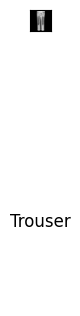

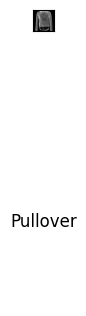

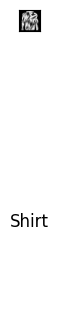

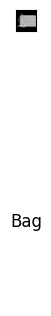

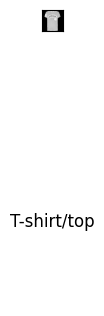

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


n=len(X_valid)
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(X_valid[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  predicted_class=np.argmax(y_pred_probs_valid[i])
  class_name = class_names[predicted_class]

  ax=plt.subplot(2,n,i+1+n)
  plt.text(0.5,0.5,class_name,fontsize=12,ha='center',va='center')


  plt.axis('off')
  plt.show()
  plt.close()


